In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy as sc

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pylab as plt

In [321]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

engage rate ~ uniform
will engage ~ bern
time = pois (engage*(unif+lognor))

In [424]:
days = 300
users = 10000

In [425]:
engagement_prob = sc.stats.uniform.rvs(0,1,size=users)

In [426]:
engage_bern = [sc.stats.bernoulli(p=engagement_prob[i]).rvs(size=days) for i in range(users)]

In [427]:
mu = 1 + engagement_prob*sc.stats.halfnorm.rvs(1,5,size=users)

In [428]:
engage_mins = [sc.stats.bernoulli(p=engagement_prob[i]).rvs(size=days)*sc.stats.poisson(mu=mu[i]).rvs(size=days) for i in range(users)]

In [429]:
data = pd.DataFrame(engage_mins)

In [430]:
data['eng_rate'] = engagement_prob

In [431]:
data['mean_eng_min'] = mu

In [432]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,eng_rate,mean_eng_min
0,0,0,0,0,0,3,4,0,7,1,0,0,5,0,0,0,0,0,0,7,2,0,0,3,0,4,5,5,1,0,0,0,0,6,0,0,8,5,5,0,3,0,7,0,7,0,0,0,0,6,0,2,0,10,0,0,0,0,7,0,0,0,0,0,4,6,0,0,1,0,3,0,0,0,8,8,0,2,9,0,5,9,0,0,0,0,7,5,0,0,0,0,6,0,0,6,0,6,0,3,...,0,6,8,0,6,4,6,6,4,0,0,3,0,6,7,0,2,0,0,0,0,0,0,0,9,0,0,0,0,5,12,0,0,0,0,0,0,0,6,3,5,5,6,7,0,7,5,0,6,0,0,4,0,0,0,5,0,0,5,0,0,8,0,5,0,0,8,0,0,2,7,0,7,7,8,0,0,0,4,0,5,0,0,0,0,7,5,6,0,7,0,2,0,0,6,0,6,0,0.428128,4.992834
1,0,0,0,6,4,0,0,0,3,0,0,0,6,0,0,1,3,0,6,0,2,0,4,0,0,2,2,0,0,0,0,3,3,0,1,0,0,0,0,0,3,0,3,0,2,0,2,0,0,2,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,2,0,6,0,4,0,4,0,0,0,1,0,3,5,4,0,0,0,0,3,2,1,0,0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,2,0,2,2,0,0,0,0,0,0,0,1,3,0,0,0,1,2,0,0,0,0,0,0,0,0,2,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,3,2,0,0,0,1,0,0,0,0,0,0,1,0,0,3,0,6,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,2,2,0,0,3,0.308290,2.084297
2,7,0,0,0,4,1,8,4,5,6,1,2,1,4,2,0,4,0,4,0,0,3,4,5,4,2,0,0,0,0,6,0,6,1,0,0,0,4,0,3,4,0,3,2,0,0,1,4,0,2,0,6,2,0,6,0,3,0,0,5,0,0,3,3,7,0,1,0,0,1,0,8,0,2,8,0,0,0,2,5,0,3,0,0,7,4,2,4,5,6,0,2,0,0,0,0,0,0,0,2,...,0,7,0,3,0,4,5,0,0,4,3,3,0,4,0,0,1,1,2,0,6,0,2,0,6,3,4,5,0,6,0,4,1,0,2,0,0,1,1,2,7,2,6,2,0,0,3,0,0,2,0,5,0,7,2,0,2,4,0,0,5,0,4,5,0,1,0,0,0,3,1,3,0,0,4,7,0,4,3,1,2,5,3,3,1,0,3,3,3,9,2,0,7,3,0,2,6,0,0.679768,3.621938
3,6,0,6,5,6,0,0,9,12,5,6,5,8,6,7,11,11,9,12,12,9,12,9,11,8,6,10,8,4,0,9,8,4,0,7,10,8,6,5,8,7,4,8,10,6,13,7,11,8,4,8,5,6,8,4,0,8,4,7,8,7,6,10,8,0,5,6,0,4,0,6,9,8,0,0,6,15,9,10,5,8,7,10,0,3,6,12,0,10,7,0,4,13,11,8,9,7,12,5,4,...,7,7,7,7,4,8,9,4,11,0,9,9,3,0,8,11,6,7,0,6,7,9,7,11,8,3,7,8,7,5,4,8,0,9,9,0,7,16,5,8,0,0,4,9,11,10,6,6,5,0,6,10,9,10,6,6,7,9,9,13,5,8,5,4,8,7,5,7,7,9,7,8,5,8,11,11,7,0,8,6,6,10,12,8,7,7,0,1,12,18,0,8,0,0,0,11,7,6,0.855262,7.649957
4,9,11,11,6,10,4,9,10,7,5,11,7,6,6,11,7,8,10,6,6,6,8,6,0,0,9,12,5,6,11,8,7,4,12,7,6,9,9,7,8,4,10,0,5,6,10,12,15,8,9,5,14,11,4,7,8,0,13,7,11,3,0,6,5,9,5,9,4,11,13,9,8,6,15,6,5,0,0,10,7,9,7,0,5,10,7,4,8,12,8,8,12,9,9,12,12,6,15,9,11,...,5,8,11,5,7,10,10,6,8,9,10,6,16,6,8,8,7,9,10,9,11,8,7,6,9,9,8,11,9,9,6,5,4,8,7,11,10,9,10,3,12,8,10,9,7,12,6,4,8,14,6,9,12,12,6,7,7,7,10,7,8,13,10,10,9,5,5,9,10,0,7,4,8,5,9,4,8,10,13,6,10,9,9,15,7,9,9,0,14,11,10,14,9,5,6,6,5,13,0.938751,8.007103


In [433]:
def min_max(x):
    return (x - x.min())/(x.max()-x.min())

In [434]:
for k in range(1,days):
    i = max(0,k-30)
    j = k
    data['total_engage_mins_{}_{}'.format(i,j)]=data.iloc[:,i:j].sum(axis=1)
    data['score_{}_{}'.format(i,j)] = 1-(1/(1+np.log1p(data['total_engage_mins_{}_{}'.format(i,j)])))
    data['final_score_{}_{}'.format(i,j)] = min_max(data['score_{}_{}'.format(i,j)])

In [435]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,final_score_236_266,total_engage_mins_237_267,score_237_267,final_score_237_267,total_engage_mins_238_268,score_238_268,final_score_238_268,total_engage_mins_239_269,score_239_269,final_score_239_269,total_engage_mins_240_270,score_240_270,final_score_240_270,total_engage_mins_241_271,score_241_271,final_score_241_271,total_engage_mins_242_272,score_242_272,final_score_242_272,total_engage_mins_243_273,score_243_273,final_score_243_273,total_engage_mins_244_274,score_244_274,final_score_244_274,total_engage_mins_245_275,score_245_275,final_score_245_275,total_engage_mins_246_276,score_246_276,final_score_246_276,total_engage_mins_247_277,score_247_277,final_score_247_277,total_engage_mins_248_278,score_248_278,final_score_248_278,total_engage_mins_249_279,score_249_279,final_score_249_279,total_engage_mins_250_280,score_250_280,final_score_250_280,total_engage_mins_251_281,score_251_281,final_score_251_281,total_engage_mins_252_282,score_252_282,final_score_252_282,total_engage_mins_253_283,score_253_283,final_score_253_283,total_engage_mins_254_284,score_254_284,final_score_254_284,total_engage_mins_255_285,score_255_285,final_score_255_285,total_engage_mins_256_286,score_256_286,final_score_256_286,total_engage_mins_257_287,score_257_287,final_score_257_287,total_engage_mins_258_288,score_258_288,final_score_258_288,total_engage_mins_259_289,score_259_289,final_score_259_289,total_engage_mins_260_290,score_260_290,final_score_260_290,total_engage_mins_261_291,score_261_291,final_score_261_291,total_engage_mins_262_292,score_262_292,final_score_262_292,total_engage_mins_263_293,score_263_293,final_score_263_293,total_engage_mins_264_294,score_264_294,final_score_264_294,total_engage_mins_265_295,score_265_295,final_score_265_295,total_engage_mins_266_296,score_266_296,final_score_266_296,total_engage_mins_267_297,score_267_297,final_score_267_297,total_engage_mins_268_298,score_268_298,final_score_268_298,total_engage_mins_269_299,score_269_299,final_score_269_299
0,0,0,0,0,0,3,4,0,7,1,0,0,5,0,0,0,0,0,0,7,2,0,0,3,0,4,5,5,1,0,0,0,0,6,0,0,8,5,5,0,3,0,7,0,7,0,0,0,0,6,0,2,0,10,0,0,0,0,7,0,0,0,0,0,4,6,0,0,1,0,3,0,0,0,8,8,0,2,9,0,5,9,0,0,0,0,7,5,0,0,0,0,6,0,0,6,0,6,0,3,...,0.943330,77,0.813318,0.943530,77,0.813318,0.943857,85,0.816660,0.947901,85,0.816660,0.948197,79,0.814196,0.944876,78,0.813761,0.944662,80,0.814624,0.945876,75,0.812409,0.943389,76,0.812867,0.943751,76,0.812867,0.943251,84,0.816266,0.947195,77,0.813318,0.944445,72,0.810980,0.941730,72,0.810980,0.941561,70,0.809983,0.940572,70,0.809983,0.940529,75,0.812409,0.943176,71,0.810486,0.941199,71,0.810486,0.940488,71,0.810486,0.940987,71,0.810486,0.940777,73,0.811465,0.941665,78,0.813761,0.944330,84,0.816266,0.946589,79,0.814196,0.944468,86,0.817048,0.947615,86,0.817048,0.947182,80,0.814624,0.943838,80,0.814624,0.943359,75,0.812409,0.941309,81,0.815045,0.944288,81,0.815045,0.944029,79,0.814196,0.942647
1,0,0,0,6,4,0,0,0,3,0,0,0,6,0,0,1,3,0,6,0,2,0,4,0,0,2,2,0,0,0,0,3,3,0,1,0,0,0,0,0,3,0,3,0,2,0,2,0,0,2,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,2,0,6,0,4,0,4,0,0,0,1,0,3,5,4,0,0,0,0,3,2,1,0,0,0,0,0,0,0,0,2,0,0,0,...,0.834504,12,0.719491,0.834681,12,0.719491,0.834970,12,0.719491,0.835117,12,0.719491,0.835377,12,0.719491,0.834970,13,0.725204,0.841859,12,0.719491,0.835415,12,0.719491,0.835491,15,0.734930,0.853265,15,0.734930,0.852813,21,0.755564,0.876756,21,0.755564,0.877379,21,0.755564,0.877379,21,0.755564,0.877221,21,0.755564,0.877379,21,0.755564,0.877339,21,0.755564,0.877181,21,0.755564,0.877419,26,0.767216,0.890278,26,0.767216,0.890750,24,0.762970,0.885622,21,0.755564,0.876794,21,0.755564,0.876794,18,0.746479,0.865660,16,0.739122,0.857382,16,0.739122,0.857237,16,0.739122,0.856845,16,0.739122,0.

In [436]:
ls =  [] 
for k in  range(1,days):
    i = max(0,k-30)
    j = k
    colname = 'final_score_{}_{}'.format(i,j)
    ls.append(data[[colname,'eng_rate']].corr().loc[colname,'eng_rate'])

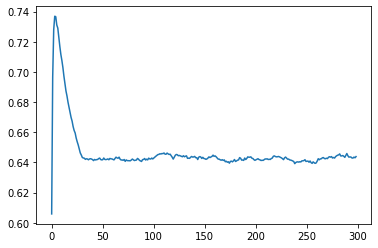

In [437]:
sns.lineplot(np.arange(len(ls)),ls)

In [438]:
data['id']=np.arange(users)

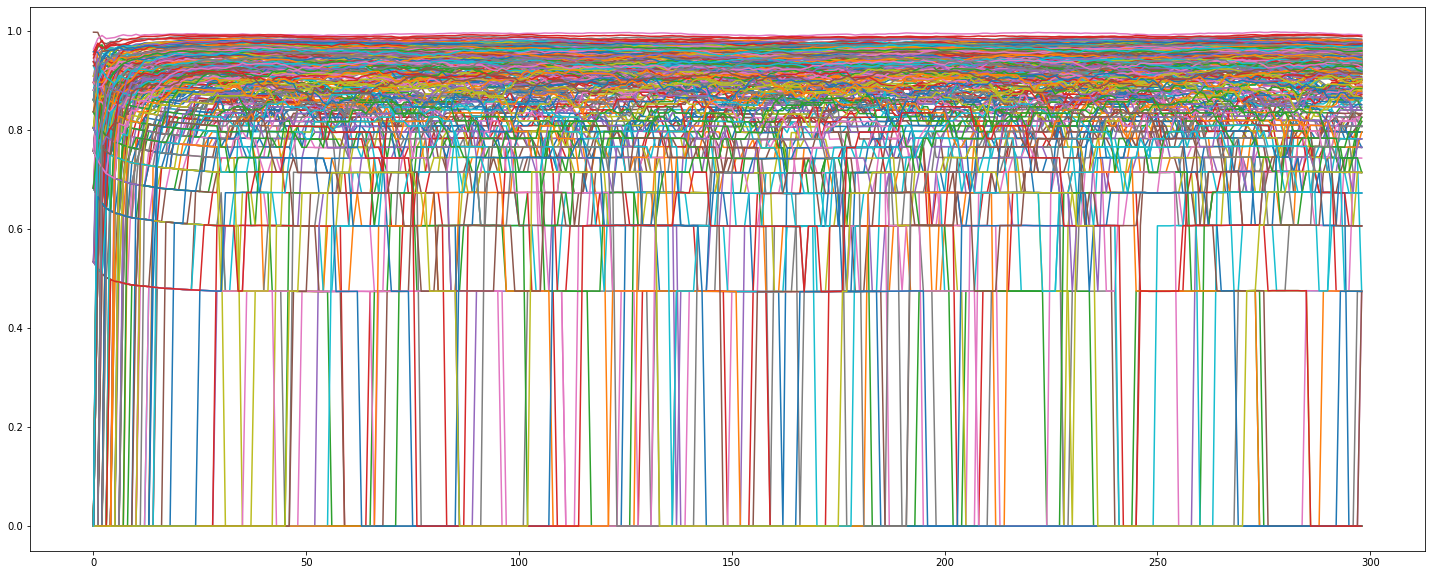

In [439]:
plt.figure(figsize=(25,10))
for i in range(250):
    sns.lineplot(x=np.arange(days-1),y=data.filter(regex='final_score_').iloc[i].values)

In [400]:
sns.distplot(data.score);

AttributeError: 'DataFrame' object has no attribute 'score'

In [402]:
sns.distplot(data.total_engage_mins);

AttributeError: 'DataFrame' object has no attribute 'total_engage_mins'

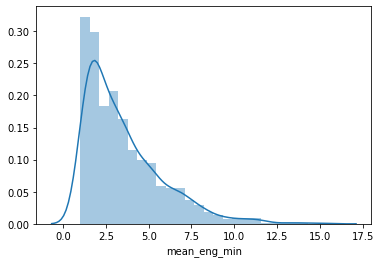

In [401]:
sns.distplot(data.mean_eng_min);

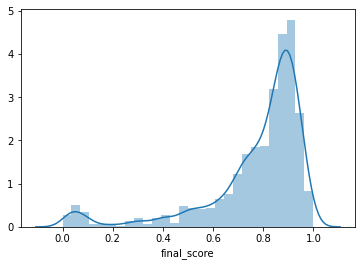

In [234]:
sns.distplot(data.final_score);